<a href="https://colab.research.google.com/github/vijaythapakdata/BigMartSalesPrediction/blob/main/BigMartSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [154]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Data Preprocessing

In [155]:
bigmart_data=pd.read_csv("/content/Train.csv")

In [156]:
#print first 5 rows of dataset
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [157]:
#print last 5 rows of dataset
bigmart_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [158]:
#print the information of dataset
bigmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [159]:
bigmart_data.shape

(8523, 12)

In [160]:
bigmart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [161]:
bigmart_data["Item_Weight"].mean()

12.857645184136183

In [162]:
bigmart_data["Item_Weight"].fillna(bigmart_data["Item_Weight"].mean(),inplace=True)

In [163]:
bigmart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [164]:
bigmart_data["Outlet_Size"].mode()

0    Medium
dtype: object

In [166]:
bigmart_data["Outlet_Size"].fillna(bigmart_data["Outlet_Size"].mode(),inplace=True)

In [167]:
bigmart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [168]:
bigmart_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Categorical Data
1. Item_Fat_Content
2. Item_Type
3. Outlet_Identifier
4. Outlet_size
5. Outlet_Location_Type
6. Outlet_type

In [169]:
bigmart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


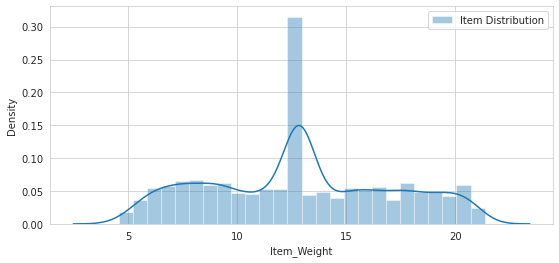

In [170]:
#item Weiht distribution
plt.figure(figsize=(9,4))
sns.distplot(bigmart_data["Item_Weight"],label="Item Distribution")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


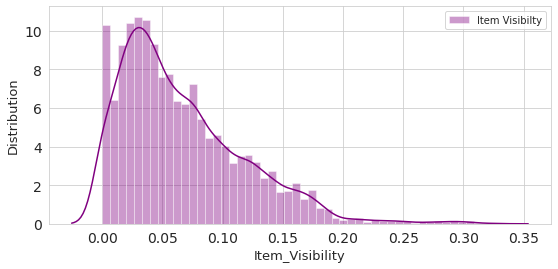

In [171]:
plt.figure(figsize=(9,4))
sns.distplot(bigmart_data["Item_Visibility"],label="Item Visibilty",color="purple")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Item_Visibility",fontsize=13)
plt.ylabel("Distribution",fontsize=13)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


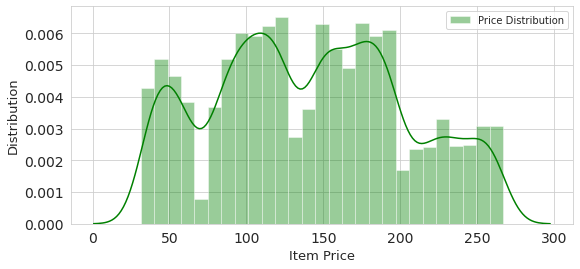

In [172]:
plt.figure(figsize=(9,4))
sns.distplot(bigmart_data["Item_MRP"],label="Price Distribution",color="green")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Item Price",fontsize=13)
plt.ylabel("Distribution",fontsize=13)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


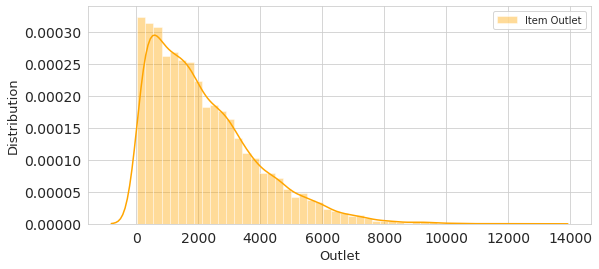

In [173]:
plt.figure(figsize=(9,4))
sns.distplot(bigmart_data["Item_Outlet_Sales"],label="Item Outlet",color="orange")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Outlet",fontsize=13)
plt.ylabel("Distribution",fontsize=13)
plt.legend()
plt.show()

In [174]:
bigmart_data["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


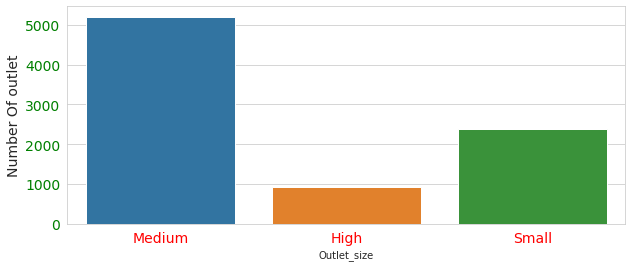

In [175]:
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
sns.countplot("Outlet_Size",data=bigmart_data)
plt.xticks(fontsize=14,color="red")
plt.yticks(fontsize=14,color="green")
plt.ylabel("Number Of outlet",fontsize=14)
plt.xlabel("Outlet_size")
plt.show()

In [176]:
bigmart_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


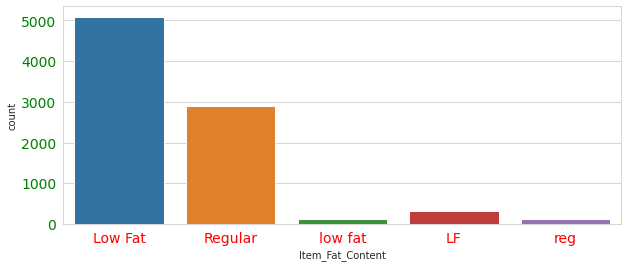

In [177]:
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
sns.countplot("Item_Fat_Content",data=bigmart_data)
plt.xticks(fontsize=14,color="red")
plt.yticks(fontsize=14,color="green")
plt.show()

In [178]:
bigmart_data["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


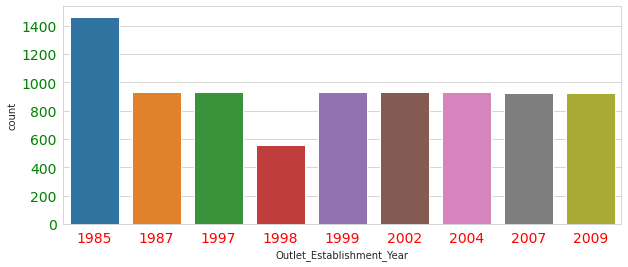

In [179]:
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
sns.countplot("Outlet_Establishment_Year",data=bigmart_data)
plt.xticks(fontsize=14,color="red")
plt.yticks(fontsize=14,color="green")
plt.show()

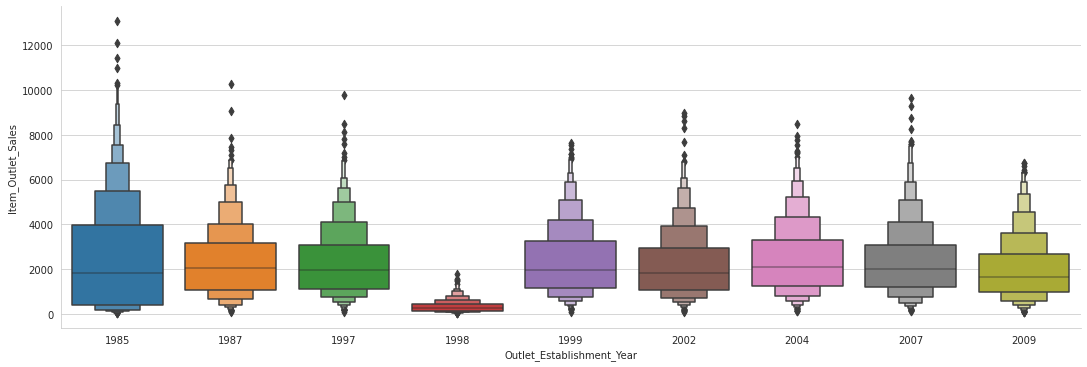

In [180]:
#Item_Outlet_Sales w.r.t Outlet_Establishment_Year

sns.catplot(y="Item_Outlet_Sales",x="Outlet_Establishment_Year",data=bigmart_data.sort_values("Item_Outlet_Sales",ascending=False),height=5,aspect=3,kind="boxen")
plt.show()

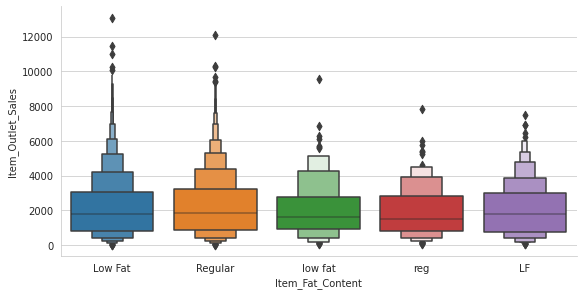

In [181]:
#Item_Fat_Content and Item_Outlet_Sales

sns.catplot(y="Item_Outlet_Sales",x="Item_Fat_Content",data=bigmart_data.sort_values("Item_Outlet_Sales",ascending=False),height=4,aspect=2,kind="boxen")
plt.show()

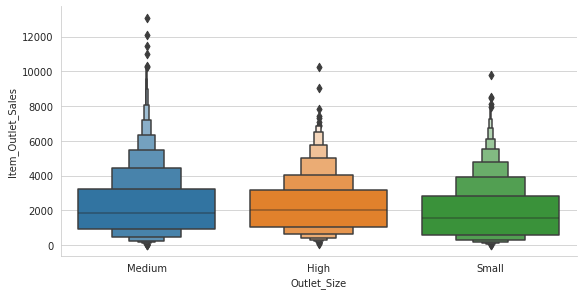

In [182]:
#Item_Outlet_Sales vs Outlet_Size
sns.catplot(y="Item_Outlet_Sales",x="Outlet_Size",data=bigmart_data.sort_values("Item_Outlet_Sales",ascending=False),height=4,aspect=2,kind="boxen")
plt.show()

In [183]:
bigmart_data["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [185]:
bigmart_data["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


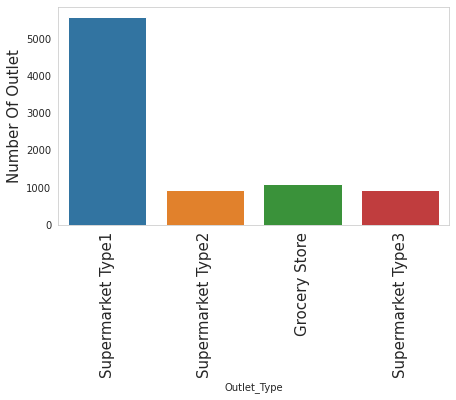

In [186]:
plt.figure(figsize=(7,4))
plt.grid(False)
sns.countplot("Outlet_Type",data=bigmart_data)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel("Number Of Outlet",fontsize=15)
plt.show()

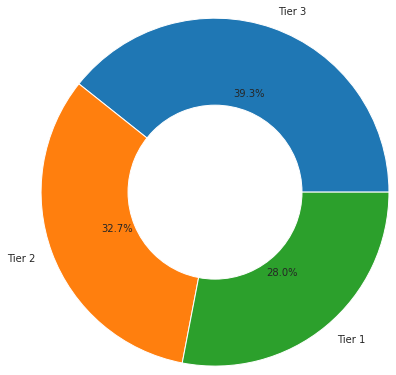

In [187]:
plt.pie(list(bigmart_data["Outlet_Location_Type"].value_counts()),labels=list(bigmart_data["Outlet_Location_Type"].value_counts().keys()),autopct="%.1f%%",radius=2)
plt.pie([1],colors=["w"],radius=1)
plt.show()

Encode Categorical Data

In [188]:
encode=LabelEncoder()

In [189]:
bigmart_data["Item_Identifier"]=encode.fit_transform(bigmart_data["Item_Identifier"])
bigmart_data["Item_Fat_Content"]=encode.fit_transform(bigmart_data["Item_Fat_Content"])
bigmart_data["Item_Type"]=encode.fit_transform(bigmart_data["Item_Type"])
bigmart_data["Outlet_Identifier"]=encode.fit_transform(bigmart_data["Item_Identifier"])
bigmart_data["Outlet_Size"]=encode.fit_transform(bigmart_data["Outlet_Size"])
bigmart_data["Outlet_Location_Type"]=encode.fit_transform(bigmart_data["Outlet_Location_Type"])
bigmart_data["Outlet_Type"]=encode.fit_transform(bigmart_data["Outlet_Type"])

In [190]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,156,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,8,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,662,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,1121,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1297,1987,0,2,1,994.7052


In [191]:
bigmart_data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,779.714889,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,449.222377,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,395.500000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,783.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,1167.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,1558.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


Feature scaling

In [194]:
X=bigmart_data.drop(columns="Item_Outlet_Sales",axis=1)
Y=bigmart_data["Item_Outlet_Sales"]

In [195]:
print(X)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]


In [196]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [197]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [198]:
print(X.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8523, 11) (6818, 11) (1705, 11) (6818,) (1705,)


In [199]:
from xgboost import XGBRegressor
regressor=XGBRegressor()
regressor.fit(x_train,y_train)

[14:55:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Model Evaluation

In [200]:
train_prediction=regressor.predict(x_train)

#calculate r2_score
score_1=metrics.r2_score(y_train,train_prediction)

print("The r2_score for training data is ",score_1)

The r2_score for training data is  0.6370740896105732


In [201]:
test_prediction=regressor.predict(x_test)

#calculate r2_score
score_2=metrics.r2_score(y_test,test_prediction)
print("The r2_score for test data is ", score_2)

The r2_score for test data is  0.5840748293479463
